In [1]:
#imports
import tensorflow as tf
import numpy as np
import Set_Gaussian_Data as data
import matplotlib.pyplot as plt

In [2]:
#set arrays to store data
num_x_vals = np.array([4,8,16,32,64,128,256,512])
mean_training_vals = np.zeros(len(num_x_vals))
mean_testing_vals = np.zeros(len(num_x_vals))
sd_training_vals = np.zeros(len(num_x_vals))
sd_testing_vals = np.zeros(len(num_x_vals))

In [5]:
#load input data for gaussian
training = data.create_training_set(1000, 100) #outputs an array of x_vals, mean values, and sigma values respectively
x_train = training[0] 
y_train = training[1] 
z_train = training[2]
y_train = y_train.T #first column as mean, second column as sd
z_train = z_train.T

testing = data.create_training_set(300, 100)
x_test = testing[0] 
y_test = testing[1] 
z_test = testing[2] 
y_test = y_test.T
z_test = z_test.T


#set layers: mean model
model = tf.keras.models.Sequential() #feed forward
#input layer: 
model.add(tf.keras.layers.Input(100,)) 
#hidden layers: 
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))

#output layer:
model.add(tf.keras.layers.Dense(1,))


#optimize (train): mean data 
model.compile(optimizer = 'adam', 
          loss = 'mean_squared_error',
          metrics = [tf.keras.metrics.RootMeanSquaredError()]) 
history = model.fit(x_train, y_train, epochs = 600)
root_arr = history.history['root_mean_squared_error'] 
root_val = root_arr[len(root_arr)-1]
print("Root: " + str(root_val))
#mean_training_vals[index] = root_val

#test: mean data
results = model.evaluate(x = x_test, y = y_test)
val_loss = results[0] 
val_acc = results[1] 
#mean_testing_vals[index] = results[1] 
print(val_loss, val_acc)

#set layers: sd model
model2 = tf.keras.models.Sequential() #feed forward
#input layer:
model2.add(tf.keras.layers.Input(100,)) 
#hidden layers: 
model2.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
#output layer:
model2.add(tf.keras.layers.Dense(1,))


#optimize(train): sd data
model2.compile(optimizer = 'adam', 
          loss = 'mean_squared_error',
          metrics = [tf.keras.metrics.RootMeanSquaredError()]) 
history2 = model2.fit(x_train, z_train, epochs = 600) 
root_arr2 = history2.history['root_mean_squared_error'] 
root_val2 = root_arr2[len(root_arr2)-1]
print("Root: " + str(root_val2))
#sd_training_vals[index] = root_val2

#test: sd data
results = model.evaluate(x = x_test, y = z_test)
val_loss = results[0] 
val_acc = results[1] 
#sd_testing_vals[index] = results[1] 
print(val_loss, val_acc)


    

Train on 1000 samples
Epoch 1/600
1000/1000 [==============================] - 1s 903us/sample - loss: 0.3687 - root_mean_squared_error: 0.6072
Epoch 2/600
1000/1000 [==============================] - 0s 127us/sample - loss: 0.5803 - root_mean_squared_error: 0.7618
Epoch 3/600
1000/1000 [==============================] - 0s 131us/sample - loss: 0.2696 - root_mean_squared_error: 0.5192
Epoch 4/600
1000/1000 [==============================] - 0s 126us/sample - loss: 0.3973 - root_mean_squared_error: 0.6303
Epoch 5/600
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0879 - root_mean_squared_error: 0.2964
Epoch 6/600
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0064 - root_mean_squared_error: 0.0800
Epoch 7/600
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0015 - root_mean_squared_error: 0.0393
Epoch 8/600
1000/1000 [==============================] - 0s 127us/sample - loss: 6.6901e-04 - root_mean_squared_error: 0.025

1000/1000 [==============================] - 0s 147us/sample - loss: 8.6150e-04 - root_mean_squared_error: 0.0294
Epoch 131/600
1000/1000 [==============================] - 0s 142us/sample - loss: 9.4083e-04 - root_mean_squared_error: 0.0307
Epoch 132/600
1000/1000 [==============================] - 0s 142us/sample - loss: 0.0078 - root_mean_squared_error: 0.0882
Epoch 133/600
1000/1000 [==============================] - 0s 136us/sample - loss: 0.0055 - root_mean_squared_error: 0.0738
Epoch 134/600
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0034 - root_mean_squared_error: 0.0581
Epoch 135/600
1000/1000 [==============================] - 0s 130us/sample - loss: 0.0220 - root_mean_squared_error: 0.1482
Epoch 136/600
1000/1000 [==============================] - 0s 132us/sample - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 137/600
1000/1000 [==============================] - 0s 140us/sample - loss: 0.0052 - root_mean_squared_error: 0.0724
Epoch 138/600


1000/1000 [==============================] - 0s 136us/sample - loss: 9.9081e-05 - root_mean_squared_error: 0.0100
Epoch 259/600
1000/1000 [==============================] - 0s 133us/sample - loss: 1.0618e-04 - root_mean_squared_error: 0.0103
Epoch 260/600
1000/1000 [==============================] - 0s 137us/sample - loss: 8.9615e-05 - root_mean_squared_error: 0.0095
Epoch 261/600
1000/1000 [==============================] - 0s 140us/sample - loss: 7.2852e-05 - root_mean_squared_error: 0.0085
Epoch 262/600
1000/1000 [==============================] - 0s 141us/sample - loss: 9.2071e-05 - root_mean_squared_error: 0.0096
Epoch 263/600
1000/1000 [==============================] - 0s 138us/sample - loss: 7.6656e-05 - root_mean_squared_error: 0.0088
Epoch 264/600
1000/1000 [==============================] - 0s 133us/sample - loss: 7.1802e-05 - root_mean_squared_error: 0.0085
Epoch 265/600
1000/1000 [==============================] - 0s 140us/sample - loss: 7.6444e-05 - root_mean_squared_erro

1000/1000 [==============================] - 0s 136us/sample - loss: 2.1175e-04 - root_mean_squared_error: 0.0146
Epoch 387/600
1000/1000 [==============================] - 0s 134us/sample - loss: 1.9463e-04 - root_mean_squared_error: 0.0140
Epoch 388/600
1000/1000 [==============================] - 0s 131us/sample - loss: 1.8453e-04 - root_mean_squared_error: 0.0136
Epoch 389/600
1000/1000 [==============================] - 0s 137us/sample - loss: 1.9484e-04 - root_mean_squared_error: 0.0140
Epoch 390/600
1000/1000 [==============================] - 0s 139us/sample - loss: 1.8324e-04 - root_mean_squared_error: 0.0135
Epoch 391/600
1000/1000 [==============================] - 0s 142us/sample - loss: 1.8243e-04 - root_mean_squared_error: 0.0135
Epoch 392/600
1000/1000 [==============================] - 0s 133us/sample - loss: 1.8255e-04 - root_mean_squared_error: 0.0135
Epoch 393/600
1000/1000 [==============================] - 0s 134us/sample - loss: 1.8565e-04 - root_mean_squared_erro

1000/1000 [==============================] - 0s 141us/sample - loss: 1.8176e-04 - root_mean_squared_error: 0.0135
Epoch 515/600
1000/1000 [==============================] - 0s 138us/sample - loss: 1.8852e-04 - root_mean_squared_error: 0.0137
Epoch 516/600
1000/1000 [==============================] - 0s 139us/sample - loss: 1.7673e-04 - root_mean_squared_error: 0.0133
Epoch 517/600
1000/1000 [==============================] - 0s 139us/sample - loss: 1.8256e-04 - root_mean_squared_error: 0.0135
Epoch 518/600
1000/1000 [==============================] - 0s 139us/sample - loss: 1.6895e-04 - root_mean_squared_error: 0.0130
Epoch 519/600
1000/1000 [==============================] - 0s 142us/sample - loss: 1.7782e-04 - root_mean_squared_error: 0.0133
Epoch 520/600
1000/1000 [==============================] - 0s 134us/sample - loss: 1.8308e-04 - root_mean_squared_error: 0.0135
Epoch 521/600
1000/1000 [==============================] - 0s 144us/sample - loss: 1.4590e-04 - root_mean_squared_erro

0.00010097701942868298 0.010048732
Train on 1000 samples
Epoch 1/600
1000/1000 [==============================] - 1s 869us/sample - loss: 0.2276 - root_mean_squared_error: 0.4771
Epoch 2/600
1000/1000 [==============================] - 0s 134us/sample - loss: 0.5407 - root_mean_squared_error: 0.7353
Epoch 3/600
1000/1000 [==============================] - 0s 129us/sample - loss: 0.1200 - root_mean_squared_error: 0.3465
Epoch 4/600
1000/1000 [==============================] - 0s 134us/sample - loss: 0.1035 - root_mean_squared_error: 0.3216
Epoch 5/600
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0512 - root_mean_squared_error: 0.2264
Epoch 6/600
1000/1000 [==============================] - 0s 136us/sample - loss: 0.0421 - root_mean_squared_error: 0.2052
Epoch 7/600
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0099 - root_mean_squared_error: 0.0995
Epoch 8/600
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0036 -

1000/1000 [==============================] - 0s 132us/sample - loss: 1.6167e-06 - root_mean_squared_error: 0.0013
Epoch 131/600
1000/1000 [==============================] - 0s 131us/sample - loss: 2.0443e-06 - root_mean_squared_error: 0.0014
Epoch 132/600
1000/1000 [==============================] - 0s 133us/sample - loss: 3.0781e-06 - root_mean_squared_error: 0.0018
Epoch 133/600
1000/1000 [==============================] - 0s 131us/sample - loss: 4.7767e-06 - root_mean_squared_error: 0.0022
Epoch 134/600
1000/1000 [==============================] - 0s 132us/sample - loss: 7.2976e-06 - root_mean_squared_error: 0.0027
Epoch 135/600
1000/1000 [==============================] - 0s 133us/sample - loss: 1.2577e-05 - root_mean_squared_error: 0.0035
Epoch 136/600
1000/1000 [==============================] - 0s 134us/sample - loss: 6.6340e-06 - root_mean_squared_error: 0.0026
Epoch 137/600
1000/1000 [==============================] - 0s 134us/sample - loss: 1.1588e-05 - root_mean_squared_erro

1000/1000 [==============================] - 0s 162us/sample - loss: 2.5908e-06 - root_mean_squared_error: 0.0016
Epoch 259/600
1000/1000 [==============================] - 0s 165us/sample - loss: 2.7154e-06 - root_mean_squared_error: 0.0016
Epoch 260/600
1000/1000 [==============================] - 0s 163us/sample - loss: 2.4435e-06 - root_mean_squared_error: 0.0016
Epoch 261/600
1000/1000 [==============================] - 0s 168us/sample - loss: 2.4387e-06 - root_mean_squared_error: 0.0016
Epoch 262/600
1000/1000 [==============================] - 0s 171us/sample - loss: 2.3719e-06 - root_mean_squared_error: 0.0015
Epoch 263/600
1000/1000 [==============================] - 0s 163us/sample - loss: 2.2878e-06 - root_mean_squared_error: 0.0015
Epoch 264/600
1000/1000 [==============================] - 0s 168us/sample - loss: 2.2214e-06 - root_mean_squared_error: 0.0015
Epoch 265/600
1000/1000 [==============================] - 0s 167us/sample - loss: 2.3020e-06 - root_mean_squared_erro

1000/1000 [==============================] - 0s 132us/sample - loss: 1.0198e-05 - root_mean_squared_error: 0.0032
Epoch 387/600
1000/1000 [==============================] - 0s 131us/sample - loss: 7.4243e-06 - root_mean_squared_error: 0.0027
Epoch 388/600
1000/1000 [==============================] - 0s 136us/sample - loss: 6.1568e-06 - root_mean_squared_error: 0.0025
Epoch 389/600
1000/1000 [==============================] - 0s 135us/sample - loss: 4.0164e-06 - root_mean_squared_error: 0.0020
Epoch 390/600
1000/1000 [==============================] - 0s 136us/sample - loss: 4.1324e-06 - root_mean_squared_error: 0.0020
Epoch 391/600
1000/1000 [==============================] - 0s 134us/sample - loss: 4.1858e-06 - root_mean_squared_error: 0.0020
Epoch 392/600
1000/1000 [==============================] - 0s 133us/sample - loss: 4.1573e-06 - root_mean_squared_error: 0.0020
Epoch 393/600
1000/1000 [==============================] - 0s 132us/sample - loss: 4.3604e-06 - root_mean_squared_erro

1000/1000 [==============================] - 0s 128us/sample - loss: 8.8440e-06 - root_mean_squared_error: 0.0030
Epoch 515/600
1000/1000 [==============================] - 0s 121us/sample - loss: 1.4264e-05 - root_mean_squared_error: 0.0038
Epoch 516/600
1000/1000 [==============================] - 0s 122us/sample - loss: 1.6677e-05 - root_mean_squared_error: 0.0041
Epoch 517/600
1000/1000 [==============================] - 0s 123us/sample - loss: 8.3083e-06 - root_mean_squared_error: 0.0029
Epoch 518/600
1000/1000 [==============================] - 0s 122us/sample - loss: 1.1471e-05 - root_mean_squared_error: 0.0034
Epoch 519/600
1000/1000 [==============================] - 0s 121us/sample - loss: 9.3152e-06 - root_mean_squared_error: 0.0031
Epoch 520/600
1000/1000 [==============================] - 0s 120us/sample - loss: 1.0336e-05 - root_mean_squared_error: 0.0032
Epoch 521/600
1000/1000 [==============================] - 0s 120us/sample - loss: 3.3399e-05 - root_mean_squared_erro

0.04082763974865278 0.20205851


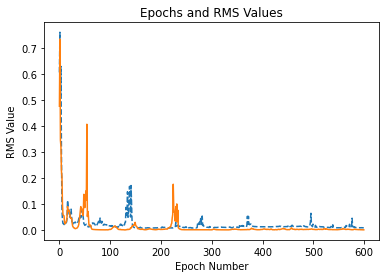

<Figure size 432x288 with 0 Axes>

In [9]:
#plot epoch number vs. RMS value for mean (blue) and sd(orange) training values 
plt.plot(range(600), history.history['root_mean_squared_error'], linestyle = '--') 
plt.plot(range(600), history2.history['root_mean_squared_error']) 
plt.xlabel('Epoch Number')
plt.ylabel('RMS Value')
plt.title('Epochs and RMS Values')
plt.show() 
plt.savefig('Epochs_RMS_Values_Gaussian.png') 

In [ ]:
predictions = predictions.T
y_test = y_test.T

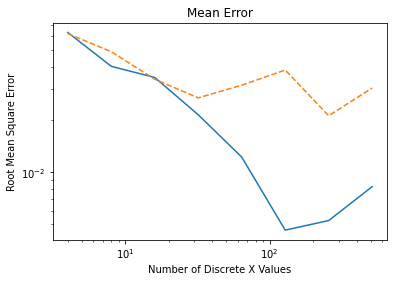

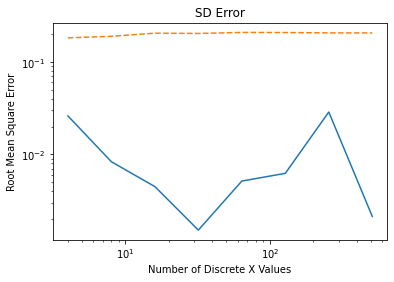

In [24]:
#plot of mean RMS vs. number of discrete x inputs (training and testing)
plt.plot(num_x_vals, mean_training_vals, label = "Training", linestyle = '-')
plt.plot(num_x_vals, mean_testing_vals, label = "Testing", linestyle = '--') 
plt.title('Mean Error')
plt.ylabel('Root Mean Square Error')
plt.xlabel('Number of Discrete X Values')
plt.xscale('log')
plt.yscale('log')
plt.show() 

#plot of sd RMS vs. number of discrete x inputs (training and testing)
plt.title("SD Error")
plt.plot(num_x_vals, sd_training_vals, label = "Training", linestyle = '-')
plt.plot(num_x_vals, sd_testing_vals, label = "Testing", linestyle = '--') 
plt.ylabel('Root Mean Square Error')
plt.xlabel('Number of Discrete X Values')
plt.xscale('log')
plt.yscale('log')
#plt.xscale('log') 
plt.show() 

In [39]:
#saves the model data
model.save('mean_and_sd.model')
new_model = tf.keras.models.load_model('mean_and_sd.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mean_and_sd.model/assets


In [40]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(x_test) #predicts all means and standard deviations of the x_test dataset 

X Input Values: [-3.15450484e-25 -6.87050751e-24 -1.37604819e-22 -2.53434461e-21
 -4.29224890e-20 -6.68484482e-19 -9.57381354e-18 -1.26085691e-16
 -1.52698174e-15 -1.70054875e-14 -1.74153229e-13 -1.64006545e-12
 -1.42029328e-11 -1.13105074e-10 -8.28272694e-10 -5.57765700e-09
 -3.45396129e-08 -1.96684589e-07 -1.02993638e-06 -4.95949745e-06
 -2.19610017e-05 -8.94239442e-05 -3.34844138e-04 -1.15297206e-03
 -3.65074978e-03 -1.06299826e-02 -2.84623167e-02 -7.00801688e-02
 -1.58674535e-01 -3.30374512e-01 -6.32547343e-01 -1.11369621e+00
 -1.80313253e+00 -2.68457634e+00 -3.67545466e+00 -4.62736317e+00
 -5.35726715e+00 -5.70348397e+00 -5.58372922e+00 -5.02684710e+00
 -4.16154127e+00 -3.16810770e+00 -2.21785359e+00 -1.42775277e+00
 -8.45201679e-01 -4.60102819e-01 -2.30322646e-01 -1.06024343e-01
 -4.48809190e-02 -1.74704904e-02 -6.25367998e-03 -2.05851205e-03
 -6.23100897e-04 -1.73440510e-04 -4.43945758e-05 -1.04495234e-05
 -2.26177946e-06 -4.50185220e-07 -8.23985202e-08 -1.38686694e-08
 -2.14653

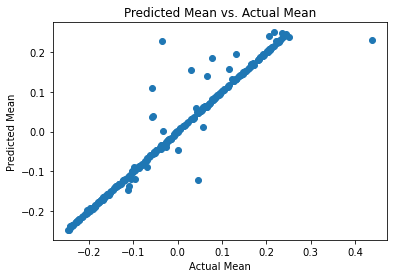

In [41]:
#mean scatter: actual vs. predicted values
plt.scatter(predictions[0],y_test[0]) #mean
plt.title('Predicted Mean vs. Actual Mean')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.show() 

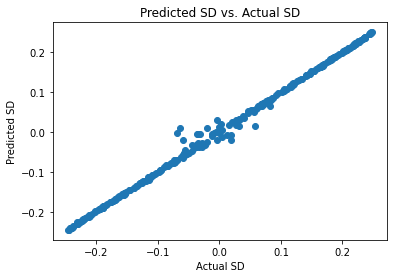

In [42]:
#sd scatter: actual vs. predicted values
plt.scatter(predictions[1],y_test[1]) #SD
plt.title('Predicted SD vs. Actual SD')
plt.xlabel('Actual SD')
plt.ylabel('Predicted SD')
plt.show()

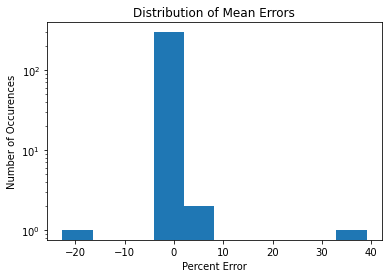

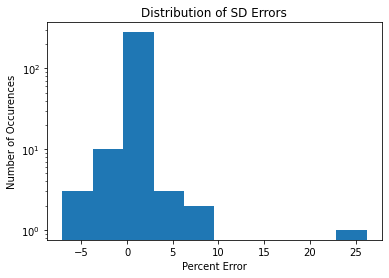

In [45]:
#histogram to represent absolute error between actual and predicted values for each label
plt.hist((predictions[0]-y_test[0]))
plt.yscale('log')
plt.title('Distribution of Mean Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Percent Error')
plt.show()
plt.hist((predictions[1]-y_test[1]))
plt.yscale('log') 
plt.title('Distribution of SD Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Percent Error') 
plt.show() 